<img  src=http://repository.icesi.edu.co/biblioteca_digital/image/icesi-logo.svg height="250" width="250">

**Author: Javier Díaz, Christian Urcuqui**

**Edited by: Miguel Ángel Torres Sánchez**

Notas: Se usa este documento, propuesto por el profesor Christian Urcuqui, como una plantilla para el desarrollo de los análisis y sus conclusiones.
El desarrollo de los algoritmos, sus mediciones y las conclusiones podran encontrarse más adelante en este documento a pártir del titulo: **Técnicas para el reconocimiento de digitos (shapes).**
        

# Programación tradicional vs. aprendizaje automático

Imagínen que ustedes trabajan en el correo, y quieren automatizar el despacho de los paquetes y cartas.

Ya disponen de un software que logra capturar las direcciones y separarlas caracter por caracter en imágenes de 8 píxeles x 8 píxeles en escala de grises, tales que 0 es el negro absoluto, y entre mayor el valor más claro el pixel.

Ese software además puede inferir, según el lugar de los caracteres en la dirección, si cada caracter es una letra o un dígito, pero su labor se termina ahí. 

<img src="http://rasbt.github.io/mlxtend/user_guide/data/mnist_data_files/mnist_data_10_0.png" />

## Programación tradicional
Ustedes ahora tienen que pensar en 2 programas diferentes: uno que pueda identificar las clases de las imágenes de dígitos (0 a 9) y otro que pueda clasificar los caracteres letra (a-z,A-Z).

Centrémonos en el primer problema de clasificación de imágenes de dígitos.

Consideren que el dataset con las imágenes a tratar ya está disponible en una librería que produce el primer software:

In [1]:
from sklearn.datasets import load_digits
import pylab as pl
import sklearn

In [2]:
digits = load_digits()
type(digits)

sklearn.utils.Bunch

In [ ]:
?sklearn.utils.Bunch

In [4]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [5]:
#for i in range(0,5):
print(digits.images[1])

[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]


In [6]:
print(digits.images[1][:,4])

[13. 16. 16. 16. 16. 16. 16. 16.]


Se tienen en total: 1797 imágenes
[[ 0.  0. 12.  8.  8.  7.  0.  0.]
 [ 0.  3. 16. 16. 11.  7.  0.  0.]
 [ 0.  2. 14.  1.  0.  0.  0.  0.]
 [ 0.  5. 14.  5.  0.  0.  0.  0.]
 [ 0.  2. 15. 16.  9.  0.  0.  0.]
 [ 0.  0.  0.  2. 16.  2.  0.  0.]
 [ 0.  0.  4.  8. 16.  4.  0.  0.]
 [ 0.  0. 11. 14.  9.  0.  0.  0.]]


<Figure size 432x288 with 0 Axes>

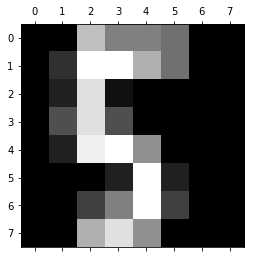

In [7]:
digits = load_digits()
pl.gray() # Queremos las imágenes en grises
pl.matshow(digits.images[25]) # Imprimir una imagen dada
numImagenes = len(digits.images) # Numero de imagenes, len es un método que provee el tamaño del arreglo
print("Se tienen en total:", numImagenes, "imágenes")
print(digits.images[25]) # Ver su representación en pixeles

In [8]:
type(digits)

sklearn.utils.Bunch

In [9]:
?sklearn.utils.Bunch

Init signature: sklearn.utils.Bunch(**kwargs)
Docstring:     
Container object for datasets

Dictionary-like object that exposes its keys as attributes.

>>> b = Bunch(a=1, b=2)
>>> b['b']
2
>>> b.b
2
>>> b.a = 3
>>> b['a']
3
>>> b.c = 6
>>> b['c']
6
File:           c:\users\mgltorsa\anaconda3\lib\site-packages\sklearn\utils\__init__.py
Type:           type
Subclasses:     


In [10]:
digits['images'][8]

array([[ 0.,  0.,  9., 14.,  8.,  1.,  0.,  0.],
       [ 0.,  0., 12., 14., 14., 12.,  0.,  0.],
       [ 0.,  0.,  9., 10.,  0., 15.,  4.,  0.],
       [ 0.,  0.,  3., 16., 12., 14.,  2.,  0.],
       [ 0.,  0.,  4., 16., 16.,  2.,  0.,  0.],
       [ 0.,  3., 16.,  8., 10., 13.,  2.,  0.],
       [ 0.,  1., 15.,  1.,  3., 16.,  8.,  0.],
       [ 0.,  0., 11., 16., 15., 11.,  1.,  0.]])

Después de un proceso de etiquetado manual de varios días, realizado por un estudiante de pregrado en ingeniería de sistemas, en el que manualmente se clasificaron las imágenes una a una, se pudo obtener un *ground truth* con las clases reales de cada imagen.

Las etiquetas de las imágenes que indican el dígito real se encuentran disponibles:

In [11]:
y = digits.target # el método nos provee las etiquetas de las imágenes en un arreglo
print(y[25])

5


Para poder simplificar la representación de los datos, se pueden aplanar las matrices de pixeles para poner cada imagen en un solo array de 64 pixeles:

In [12]:
X = digits.images.reshape((numImagenes, -1)) # se reducen las dimensiones
print(X[25])

[ 0.  0. 12.  8.  8.  7.  0.  0.  0.  3. 16. 16. 11.  7.  0.  0.  0.  2.
 14.  1.  0.  0.  0.  0.  0.  5. 14.  5.  0.  0.  0.  0.  0.  2. 15. 16.
  9.  0.  0.  0.  0.  0.  0.  2. 16.  2.  0.  0.  0.  0.  4.  8. 16.  4.
  0.  0.  0.  0. 11. 14.  9.  0.  0.  0.]


**Traten de pensar en un programa tradicional que les permita clasificar cualquier imágen de números en el dígito correspondiente.**

...

...

## Aprendizaje automático

Con un modelo de **machine learning** se puede realizar esta tarea de una manera bastante sencilla.

In [13]:
#from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics as metrics
import pylab as plt

gnb = GaussianNB()
fit = gnb.fit(X, y)

Se pueden evaluar las clases estimadas por el modelo vs. las clases reales

In [14]:
y_estimado = fit.predict(X)
print("Reales   :", y[0:25])
print("Estimados:", y_estimado[0:25])

Reales   : [0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4]
Estimados: [0 1 8 3 4 9 6 7 8 9 0 1 2 3 4 5 6 7 7 3 0 1 2 3 4]


Podemos tener una idea más clara de los casos en los que se equivoca el modelo:

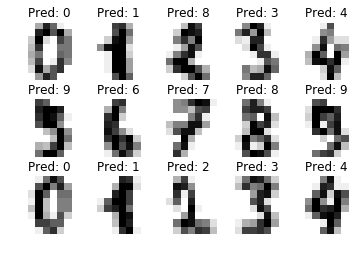

In [15]:
images_and_predictions = list(zip(digits.images, y_estimado))
for index, (image, prediction) in enumerate(images_and_predictions[:15]):
    plt.subplot(3,5, index+1) #se crean los placeholders de 3x5 filasXcolumnas
    plt.axis('off')  #se quitan los ejes
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title('Pred: %i' % prediction)
plt.show()

Nos gustaría tener una idea de la correctitud global del modelo aprendido.

In [16]:
metrics.accuracy_score(y, y_estimado)

0.8580968280467446

# Técnicas para el reconocimiento de digitos (shapes) 
## A partir de aqui, se presentarán diferentes técnicas y se evaluaran.
Previamente hemos podido utilizar las herramientas de sklearn para cargar las imágenes del dataset notMNIST, a través de pylab visualizamos una muestra y finalmente utilizamos un primer algoritmo de machine learning (Naive Bayes) para el entrenamiento y la predicción de un conjunto de imágenes.

Su trabajo es aplicar un método de programación tradicional, es decir, sin usar modelos basados en machine learning. El método debe estar en la capacidad de identificar la etiqueta (el número asignado a la imagen) del conjunto de NotMNIST.

Cada pareja de estudiantes se debe encargar de predecir 2 dígitos, específicamente, cada grupo debe seleccionar entre las siguientes opciones de dígitos:

+ 1 y 5
+ 8 y 2
+ 9 y 7
+ 0 y 3
+ 4 y 6

Cada dígito implica la creación de un modelo de clasificación para disitinguir si el dígito está o no en la imagen.
Una vez implementados los modelos, para cada modelo, calcule:
+ El accuracy y kappa global de cada clasificador
+ El precision, recall, especificidad y F-Measure de cada clase


# Desarrollo Tarea
## Preparación

Antes de implementar las técnicas y desarrollar los análisis, importaremos time que nos permitirá medir los tiempos de ejecución de las rutinas necesarias.

In [17]:
from time import time

## Reconocimiento a tráves de un algoritmo deterministico

Repositorios: 
-Fork Data-science: https://github.com/mgltorsa/Data-Science/blob/master/Artificial%20Intelligence/machine%20learning/MNIST%20-%20Programación%20Tradicional%20vs.%20Machine%20Learning.ipynb
-Handwritten-shapes: https://github.com/mgltorsa/Handwritten-shapes

Se implementaron 2 modulos en python, llamados main.py y shapes.py, en esta ultima una pequeña clase llamada Shape,

En la clase Shape estan implementados diversos metodos que permiten un mejor manejo del problema, ademas de esto cuenta con unos atributos como: __shape (Matriz ideal que se usara para evaluar las otras matrices), __sumValues (suma de los valores de esta matriz ideal)

El metodo preProcessing en Shape se usa en palabras generales para preparar una matriz objetivo de evaluacion para el proceso de determinar que numero es (leer documentacion).

Para calcular la semejanza en matrices se usa el metodo calculateLikeness en Shape que evalua una matriz objetivo y determina si es o no el numero representado en la matriz del objeto de tipo Shape (atributo __shape).





In [32]:
import copy
import math
class Shape:
    MAXVALUE = 12

    def __init__(self,matrix):
        self.__shape=matrix
        self.__sumValues=0
        for row in matrix:
            for column in row:
                self.__sumValues+=column
            
    """
    devuelve una matriz con los valores aumentados
    en la proporcion del mayor numero soble MAXVALUE
    """
    def preProcessing(self, matri):
        max = -1
        matrix=copy.deepcopy(matri)
        for row in matrix:
            for column in row:
                if column > max:
                    max = column
        increment = (Shape.MAXVALUE-max)/max
        increment += 1
        
        for row in matrix:
            for  i in range(0,len(row)):
                row[i] *= increment
                row[i]=int(row[i])
        return matrix
    
    """
    calcula la semejanza entre las matrices matrix y self.__shape
    calculando la matriz diferencia entre ellas, luego se suman los
    valores de esta matriz, para finalmente dividirlo por la suma de
    los valores en self.__shape
    """
    def calculateLikeness(self,matrix):
        matrixSubst=0
        for row in range(0,len(matrix)):
            for column in range(len(matrix[0])):
                matrixSubst+=math.fabs(matrix[row][column]-self.__shape[row][column])
        tmp= matrixSubst/self.__sumValues
        return 1-tmp
    """
        pinta la matriz de la forma 
        [
            [item,...,item-n],
            .
            .
            [item,...,item-n],
        ]
    """
    def print_matrix(self):
        print("[", end="")
        for i in range(0, len(self.__shape)-1):
            print(str(self.__shape[i])+",")
        print(str(self.__shape[len(self.__shape)-1]), end="")
        print("]")

### Matrices ideales

Debido a la implementación de este algoritmo, definiremos una variable donde guardaremos y acumularemos el tiempo de entrenamiento de este algoritmo, que realmente es el tiempo de carga y filtrado de sus diferentes valores.

Definimos la variable que almacenará el tiempo del algoritmo deterministico.

In [83]:
deterministic_time = 0.0

Estas matrices son las representaciones ideales de los numeros 4 y 7, las cuales se usarán para realizar comparar las imagenes del 4 y el 7 que nos proporciona el dataset de sklearn.
Nota, dado que estas matrices se podrían considerar parte del tiempo de entrenamiento o de preparación de nuestro algoritmo, aunque sea minimo, tomaremos en cuenta el tiempo que tardan en inicializarse y asignarse.

In [90]:
start_time = time()

"""Matriz ideal para el número 4"""
matrix_4=  [[0.0, 0.0, 0.0, 1.0, 11.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 7.0, 8.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 1.0, 13.0, 6.0, 2.0, 2.0, 0.0],
[0.0, 0.0, 7.0, 15.0, 0.0, 9.0, 8.0, 0.0],
[0.0, 5.0, 16.0, 10.0, 0.0, 16.0, 6.0, 0.0],
[0.0, 4.0, 15.0, 16.0, 13.0, 16.0, 1.0, 0.0],
[0.0, 0.0, 0.0, 3.0, 15.0, 10.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 2.0, 16.0, 4.0, 0.0, 0.0]]

"""Matriz ideal para el número 7"""
matrix_7=   [[0.0, 0.0, 7.0, 8.0, 13.0, 16.0, 15.0, 1.0],
[0.0, 0.0, 7.0, 7.0, 4.0, 11.0, 12.0, 0.0],
[0.0, 0.0, 0.0, 0.0, 8.0, 13.0, 1.0, 0.0],
[0.0, 4.0, 8.0, 8.0, 15.0, 15.0, 6.0, 0.0],
[0.0, 2.0, 11.0, 15.0, 15.0, 4.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 16.0, 5.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 9.0, 15.0, 1.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 13.0, 5.0, 0.0, 0.0, 0.0, 0.0]]

neural_time=time()-start_time
print("Tiempo de carga de ambas matrices %.3f" % (neural_time))

Tiempo de carga de ambas matrices 0.001


Logramos observar que el tiempo es casi cero.

### Main

En este script encontraremos una clase Main que nos permitira cargar las matrices en sklear.datasets y usar la clase shape para evaluar estas matrices (Leer documentacion en script).

Nota: En la clase Main encontrará un valor denominado RATE, que indica el valor minimo de coincidencia que nuestro algoritmo comparador debe retornarnos para indicar que el número a evaluar es aquel con el que estamos evaluando. Por ejemplo:
Al correr el test con el número 4, el programa cargara y filtrará en un array, las imagenes del número 4 contenidas en las imagenes del dataset, luego cargara la matriz ideal del número 4 y la usará para analizar, que valores de ese array podrian ser un 4 junto a su porcentaje de coincidencia, el cual, si resulta ser superior al 50% (0.5) indicará que es un posible candidato a ser el 4.


In [99]:
import pathlib
from sklearn.datasets import load_digits
import pylab as pl
import sklearn


class Main:

    RATE=0.5
    
    """
        Inicializa la un objeto de tipo Main
    """
    def __init__(self):
        self.array_passed_key = "array_passed"
        self.successful_key = "successful"
        self.total_evaluated_key = "total_evaluated"
        self.digits=None
        self.targets=None  

    """
    Carga los digitos y los objetivos
    """
    def load_default(self):
        self.digits = load_digits()
        self.targets = self.digits.target

    """retorna la matriz ideal dependiendo el parametro number"""
    def load_number_file(self,number):
        if number==4:
            return matrix_4
        else:
            return matrix_7

    """Filtra la lista de los targets para hallar los indices de aquellas imagenes en 
        digits que son 7s o 4s (dependiendo el parametro number1)
    """
    def list_filter(self,number1, targets):
        indices_list = []
        for i in range(0, len(targets)):
            if targets[i] == number1:
                indices_list.append(i)
        return indices_list

    # Corremos el test de un número

    """Carga las matrices ideales las cuales usaremos para determinar si las matrices en digits
        son 7s o 4s
    """

    def run_test(self,number: int):
        """Cargamos las matrices ideales para armar nuestros shapes"""
        matrix = self.load_number_file(number)
        

        """Cargamos y filtramos los indices de las imagenes de estan los digitos"""

        indices_list = self.list_filter(number, self.targets)

        
        """Creamos los shapes"""
        shape = Shape(matrix)

        total_evaluated = len(indices_list)
        successful = 0

        array_passed_indices = []

        """Preparamos cada uno de los targets con el preprocesamiento"""
        for i in indices_list:

            preprocessed_matrix = shape.preProcessing(self.digits.images[i])
            # Result es la probabilidad de que sea el número.
            result = shape.calculateLikeness(preprocessed_matrix)
            #Si el resultado es >= 50% entonces es posible que este número sea el número de la matrix que se
            #esta usando. Luego comparamos si realmente si era el número que se esperaba.
            if result >= Main.RATE and self.targets[i] == number:
                array_passed_indices.append(i)
                successful += 1
            
            """print(self.digits.images[i])
            shape.print_matrix()"""

        return {
            self.array_passed_key: array_passed_indices,
            self.successful_key: successful,
            self.total_evaluated_key: total_evaluated
        }

    
    """Imprime una matriz con el siguiente formato:
        [[],
         [],
         []]
    """
    def print_matrix(self,matrix):
        print("[", end="")
        for i in range(0, len(matrix)-1):
            print(str(matrix[i])+",")
        print(str(matrix[len(matrix)-1]), end="")
        print("]")
        
    """Realiza el test a un número usando el metodo run_test
        y determina el accurancy con los datos obtenidos en el metodo run_test
        
        Ret : rate,successfull,total_evaluated:list,array_evaluated:list
        
    """
    def test_number(self,number):
        result = self.run_test(number)
        total_evaluated = result[self.total_evaluated_key]
        successful = result[self.successful_key]
        array_passed = result[self.array_passed_key]
        rate = successful/total_evaluated
        return rate,successful,total_evaluated,array_passed
    


##FIN DEL MAIN CLASS




A continuación corremos el test donde miraremos, para un arreglo de 4 o 7 dependiendo el número a evaluar, en que grado el algoritmo acertó en su comparación.

Entonces guardamos estas accuracy en 2 variables, que llamaremos: determinstic_4_accuracy y determinstic_7_accuracy.

In [102]:
main = Main()

#Carga las matrices en el dataset
main.load_default()

rate,successful,total_evaluated,array_passed =main.test_number(4)

deterministic_4_accuracy = rate

rate2,successful2,total_evaluated2,array_passed2 =main.test_number(7)

deterministic_4_accuracy = rate2



#Hacemos que el algoritmo decida que números son 4 y miramos su accuracy.
print(rate)
#Hacemos que el algoritmo decida que números son 7
print(rate2)



0.18232044198895028
0.24022346368715083


Ahora bien presentamos un pequeño algoritmo para que el usuario interactue un poco con el programa

In [42]:
#Permite al usuario entre escoger evaluar el 4 o el 7
print("Solo ingrese el 4 o el 7")

while True:
    inp = input("Ingrese número a probar, si no ingresa nada y presiona enter, saldrá: ")
    if inp:
        number = int(inp)
        print(main.test_number(number))
    else:
        print("se finalizó el test")
        break

Solo ingrese el 4 o el 7


Ingrese número a probar, si no ingresa nada y presiona enter, saldrá:  


se finalizó el test


## Reconocimiento a tráves de machine learning
### Usando KNN ( k-nearest neighbors )

Para este punto la variable X con las imagenes y la variable y ya estan definidas, junto a los imports de sklearn.metrics.

Definimos una variable en la cual guardaremos el tiempo medido para la fase de entrenamiento del algoritmo.

In [43]:
knn_time = 0.0

Definimos los porcentajes de entrenamiento y de prueba.

In [44]:
training_percentage=0.8

La cantidad de datos para entrenamiento

In [45]:
training_limit = int(training_percentage * len(y))
training_limit

1437

La cantidad de datos para prueba.

In [46]:
test_index = training_limit
test_index

1437

Redefinimos los valores de la variable X y la variable y

Definimos los targets y imagenes para el entrenamiento y las pruebas.

In [47]:
training_targets = digits.target[0:training_limit]
training_images = digits.images[0:training_limit].reshape(len(training_targets),-1)

test_targets = y[test_index:]
test_images = X[test_index:].reshape(len(test_targets),-1)

### Usando el KNN
Continuamos a implementar y entrenar el KNeighborsClassifier de la libreria sklearn

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
start_time = time()
fit = knn.fit(training_images,training_targets)
knn_time = time()-start_time

Ahora bien, miremos las estadisticas.

In [49]:
predicted = fit.predict(test_images)
print("Reales    :",test_targets[0:25])
print("Estimados :",predicted[0:25])

Reales    : [2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5]
Estimados : [2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5]


Medimos el accuracy de la predicción.

In [50]:
knn_accuracy = metrics.accuracy_score(test_targets, predicted)
knn_accuracy

0.9638888888888889

Imprimimos los datos medidos para el Knn

In [51]:
print("Printing Knn meassures")
print("Accuracy : ",knn_accuracy)
print("Time     : ",knn_time)

Printing Knn meassures
Accuracy :  0.9638888888888889
Time     :  0.04687380790710449


## Reconocimiento mediante redes neuronales.
### Usando redes neuronales de sklearn
Se realizan los imports de tensorflow junto a keras, que nos permitira crear un modelo y entrenarlo, así, definimos nuestra red neuronal.

In [54]:
import tensorflow as tf
from tensorflow import keras

Definimos la variable donde guardaremos el tiempo de entrenamiento de la red neuronal.

In [55]:
neural_time = 0.0

Ahora bien crearemos una red neuronal que contará con 5 capas, la primera de ellas tendrá 128 neuronas, y cada una de las siguientes: 80,60,50,10. Lo que significa que la respuesta de predicción del algoritmo se dara en un tensor de dimension 10 que representará las probabilidades de que la imagen pasada para predicción, pertenezca a cada uno de los 10 grupos (grupo1=0, grupo2=1.... grupo10=9, los números del 0 al 9).

In [173]:
model = keras.Sequential([
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(80),
    keras.layers.Dense(60),
    keras.layers.Dense(50),
    keras.layers.Dense(10, activation=tf.nn.softmax)    
])
model

Ahora bien, podemos indicarle a nuestro modelo las metricas que debe evaluar junto la estrategia de optimización que debe tomar para mejorar la red, en este caso: sgd, el descenso de gradiente estocastico y la función que abarcará para esto, en este caso el sparse categorical crossentropy, usado generalmente cuando se las clases en las que se van a clasificar los miembros evaluados son mutuamente excluyentes, es decir, que un individuo pertence unicamente a una clase.

In [174]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Ahora bien, entrenameros el modelo con las imagenes y los targets de training definidos en [Reconocimiento a tráves de machine learning](##Reconocimiento-a-tráves-de-machine-learning).
Ademas, usaremos el parametro epochs para indicarle a la red neuronal en cuantas fases (cuantas repeticiones) debe hacer en su entrenamiento.

Nota: se medira el tiempo de entrenamiento del modelo y se almacenara en la variable neural_time.

In [176]:
start_time = time()
model.fit(training_images,training_targets, epochs=5)
neural_time = time() - start_time

print("Tiempo de entrenamiento %.3f " % (neural_time))

Epoch 1/5
1437/1437 [==============================] - 0s 94us/sample - loss: 0.0200 - acc: 0.9972
Epoch 2/5
1437/1437 [==============================] - 0s 96us/sample - loss: 0.0159 - acc: 0.9993
Epoch 3/5
1437/1437 [==============================] - 0s 83us/sample - loss: 0.0142 - acc: 1.0000
Epoch 4/5
1437/1437 [==============================] - 0s 86us/sample - loss: 0.0125 - acc: 0.9993
Epoch 5/5
1437/1437 [==============================] - 0s 87us/sample - loss: 0.0115 - acc: 1.0000
Tiempo de entrenamiento 0.678 


Una vez entrenada la red neuronal, la usaremos para analizar las predicciones que realiza con respecto a el conjunto test designado anteriormente en el ejercicio [Reconocimiento a tráves de machine learning](##Reconocimiento-a-tráves-de-machine-learning)

In [177]:
predicted = model.predict(test_images)
print("Reales    :",test_targets[0:25])
print("Estimados :",predicted[0:25])

Reales    : [2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5]
Estimados : [[2.53722580e-13 8.98585455e-08 9.99999881e-01 1.73208115e-08
  2.80452344e-17 3.44483873e-08 3.25733746e-11 1.40115360e-14
  1.76272650e-08 5.06462072e-09]
 [3.34043708e-12 2.96543434e-09 1.21869263e-07 9.99992013e-01
  1.41763178e-14 2.93629023e-06 2.81518007e-15 4.32117142e-09
  4.19356496e-08 4.93356129e-06]
 [4.87529461e-10 2.03592478e-07 2.25968658e-12 1.82795639e-14
  9.99995232e-01 5.38474065e-09 7.71497696e-07 3.87276350e-06
  8.14612200e-09 5.45394242e-13]
 [3.15905054e-05 9.57666998e-07 4.60777372e-08 1.92907266e-02
  4.34264693e-05 9.64976609e-01 6.12314352e-07 3.42469178e-07
  2.20948525e-04 1.54347811e-02]
 [1.29498130e-05 3.54992210e-07 4.34933725e-08 2.06006145e-08
  1.57248348e-06 4.43560493e-05 9.99915719e-01 1.44912511e-11
  2.50147987e-05 5.33673314e-11]
 [9.20383103e-10 8.13574035e-12 3.51487301e-07 4.58458871e-08
  5.97829398e-07 3.39334838e-06 5.35453897e-13 9.99995589e-01
  9.77259074e-0

Ahora bien, podemos usar el modelo que nos da keras para evaluar el accuracy comparando como el modelo trabaja con los datos de test.
Midiendo el accuracy de la predicción, haciendo uso de los targets de test que habiamos separado con anterioridad.

In [178]:
test_loss, neural_accuracy = model.evaluate(test_images, test_targets)

print('Test accuracy:', neural_accuracy)

360/360 [==============================] - 0s 528us/sample - loss: 0.3675 - acc: 0.9056
Test accuracy: 0.90555555


Finalmente, agruparemos y mostrarremos los datos medidos para la red neuronal.

In [179]:
print("Printing kera meassures")
print("Accuracy : ",neural_accuracy)
print("Time     : ",neural_time)

Printing kera meassures
Accuracy :  0.90555555
Time     :  0.6778242588043213


# Comparación contra el mejor modelo KMeans

Primero, compararemos los tiempos de entrenamiento del perceptron y del knn

In [180]:
print("Neural time     : ",neural_time)
print("Knn time        : ",knn_time)

Neural time     :  0.6778242588043213
Knn time        :  0.04687380790710449


Observamos que el tiempo de entrenamiento para la red neuronal es alta comparada con el tiempo de entrenamiento de knn, pero, ¿qué tal es su precisión?

In [182]:
print("Neural accuracy     : ",neural_accuracy)
print("Knn accuracy        : ",knn_accuracy)

Neural accuracy     :  0.90555555
Knn accuracy        :  0.9638888888888889


Vemos que, la precisión del Knn termina siendo mejor que la de la red neuronal. Esto puede deberse a diversos aspectos:
+ Las epochs con las que se entrenó la red neuronal no fueron suficientes para reducir el error al minimo de predicción.
+ Quiza la estrategia de descenso de gradiente estocastico no es la adecuada para este problema.

Sin embargo, el uso de una red neuronal puede ser la estrategia más viable, ya que, en esta contamos con estrategias como 'sdg' que nos permiten disminuir el error de predicción, y con esto, mejorar en el entrenamiento de la red.